# Chapter 7: Combining different models for ensemble learning


## Learning with ensembles

*Ensemble methods* combine multiple estimators into a single estimator that has better generalization than each classifier alone.  Many use *majority voting*, meaning a label must recieve more than 50% of the 'votes' in the component models; a generalization can be made with *plurality voting*, where the final label is decided by the label with the most votes.

This can be written as:
$$
    \hat{y}  = \text{mode}\{C_1(x), \dots, C_m(x)\}
$$ 
for $m$ models.  If the error rates of each classifier are independent and all have an equal error rate, $\epsilon$, then:
$$
    P(y \geq k) = \sum_k^n \left\langle \begin{matrix} n \\ k \end{matrix} \right\rangle \epsilon^k(1-\epsilon)^{n-k} = \epsilon_{ensemble}
$$
Note that $\epsilon \leq 0$.  Therefore the error rate of the ensemble must be lower.  This sum can be implemented and graphed in Python.

In [5]:
from scipy.special import comb
import math

def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.))
    probs = [comb(n_classifier, k) * error**k * (1-error)**(n_classifier - k) for k in range(k_start, n_classifier + 1)]
    return sum(probs)

ensemble_error(n_classifier=11, error=0.25)     

0.03432750701904297

From the graph below it is clear that the ensemble error is always better than the base error.

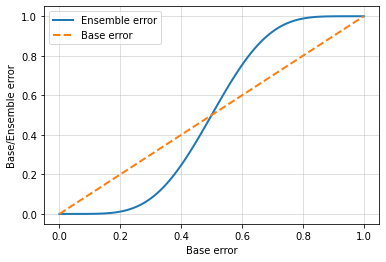

In [6]:
import numpy as np
import matplotlib.pyplot as plt
error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error) for error in error_range]
plt.plot(error_range, ens_errors, label='Ensemble error', linewidth=2)
plt.plot(error_range, error_range, linestyle='--', label='Base error', linewidth=2)
plt.xlabel('Base error')
plt.ylabel('Base/Ensemble error') 
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.show()

## Combining classifier via majority vote

### Implementing a simple majority vote classifier

